In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pd.set_option('display.max_colwidth', 120)

pd_res = pd.read_csv('out/results/parse_res.prof')

BASE_MACHINE_NAME = 'kv7'

def plot_hist(category_name, yscale, xmargin, tick_rotation, xlabel, ylabel, ylim=None):
    category = pd_res[pd_res['benchmark'].str.contains(category_name)].sort_values('benchmark')

    # recreate a new view with benchmarks with all machines
    category_df = pd.DataFrame(data=category['benchmark'], columns=['benchmark'])
    machines = category['machine'].unique()

    for m in machines:
        category_df[m] = category[category['machine'] == m]['result']

    category_df[BASE_MACHINE_NAME] = category[category['machine'] == machines[0]]['base_result']
    category_df = category_df.reset_index(drop=True)

    # start to draw figrue
    all_machines = machines.tolist() + [BASE_MACHINE_NAME]
    names = category_df['benchmark'].tolist()
    values  = [category_df[m].tolist() for m in all_machines]
    colors = cm.gist_rainbow(np.linspace(0, 1, 5))

    pos = np.arange(len(values[0]))
    width = 1. / (5 + len(values))

    bars = []
    fig, ax = plt.subplots()
    
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])
    
    for idx, (v, color) in enumerate(zip(values, colors)):
        bars.append(ax.bar(left=pos + idx * width, height=v, width=width, alpha=0.7, color=color))

    ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
    ax.set_yscale(yscale)
    ax.margins(xmargin, None)
    ax.set_xticks(pos + width)
    ax.set_xticklabels(names, rotation=tick_rotation)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    return category_df

### SysBench: CPU performance test

#### When running with the CPU workload, sysbench will verify prime numbers by doing standard division of the number by all numbers between 2 and the square root of the number. If any number gives a remainder of 0, the next number is calculated.

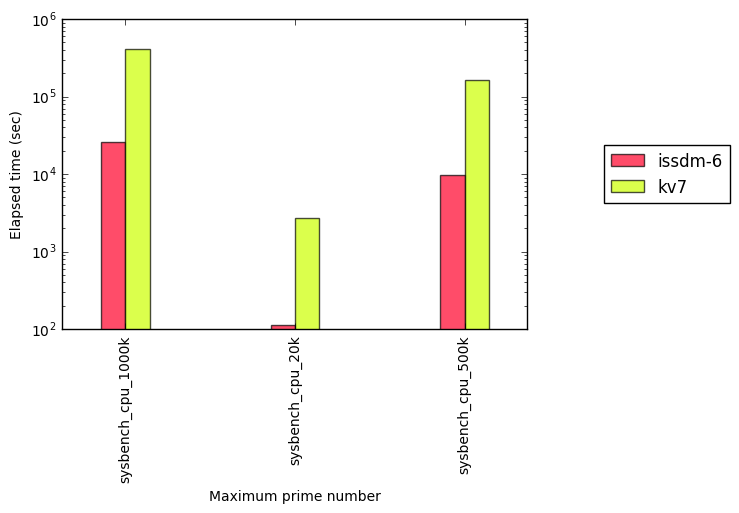

,benchmark,issdm-6,kv7
0,sysbench_cpu_1000k,25829.0342,409274.7966
1,sysbench_cpu_20k,112.0762,2744.1611
2,sysbench_cpu_500k,9770.9176,161753.9656


In [2]:
sysbench_cpu_df = plot_hist(category_name='sysbench_cpu', yscale='log',
                            xmargin=0.1 , tick_rotation='vertical',
                            xlabel='Maximum prime number', ylabel='Elapsed time (sec)')
sysbench_cpu_df

### SysBench: Memory functions speed test

#### When using the memory workload, sysbench will allocate a buffer (1KByte in this case) and each execution will read or write to this memory in a random or sequential manner. This is then total execution time in seconds is reached (300 seconds).

**Command arguments**: memory-block-size=1K, memory-oper=read/write, memory-access-mode=seq/rnd, max-time=300, max-requests=0 num-threads=[1,2,3,4,5]

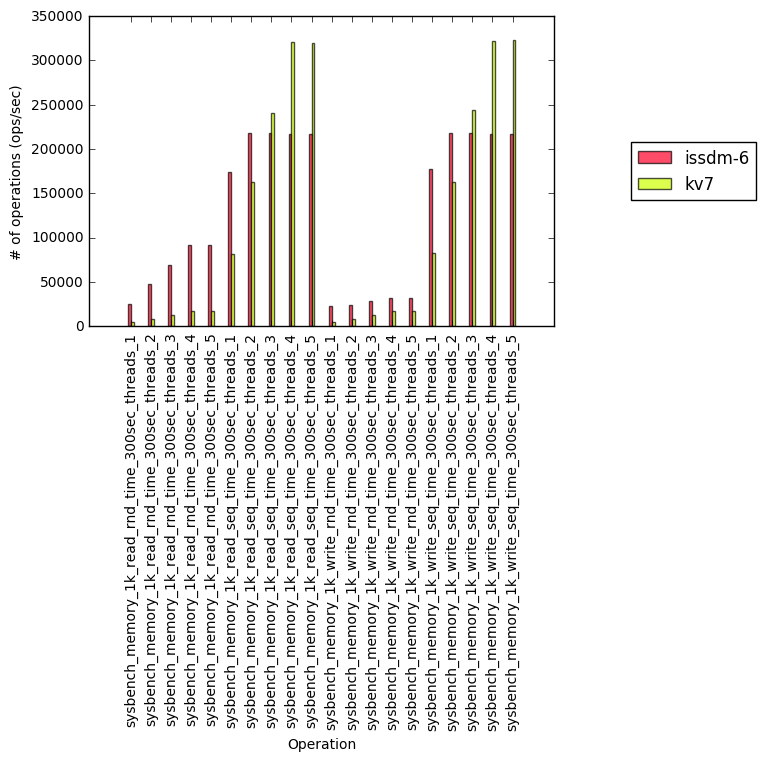

,benchmark,issdm-6,kv7
0,sysbench_memory_1k_read_rnd_time_300sec_threads_1,24567.43,4235.70
1,sysbench_memory_1k_read_rnd_time_300sec_threads_2,47450.13,8499.66
2,sysbench_memory_1k_read_rnd_time_300sec_threads_3,68726.20,12770.54
3,sysbench_memory_1k_read_rnd_time_300sec_threads_4,91293.51,16971.28
4,sysbench_memory_1k_read_rnd_time_300sec_threads_5,91178.87,16877.65
5,sysbench_memory_1k_read_seq_time_300sec_threads_1,174458.77,81895.23
6,sysbench_memory_1k_read_seq_time_300sec_threads_2,218222.01,162202.09
7,sysbench_memory_1k_read_seq_time_300sec_threads_3,217545.66,241114.13
8,sysbench_memory_1k_read_seq_time_300sec_threads_4,217363.10,320783.71
9,sysbench_memory_1k_read_seq_time_300sec_threads_5,217345.59,319679.90


In [3]:
sysbench_memory_df = plot_hist(category_name='sysbench_memory', yscale='linear',
                               xmargin=0.1 , tick_rotation='vertical',
                               xlabel='Operation', ylabel='# of operations (ops/sec)')
sysbench_memory_df

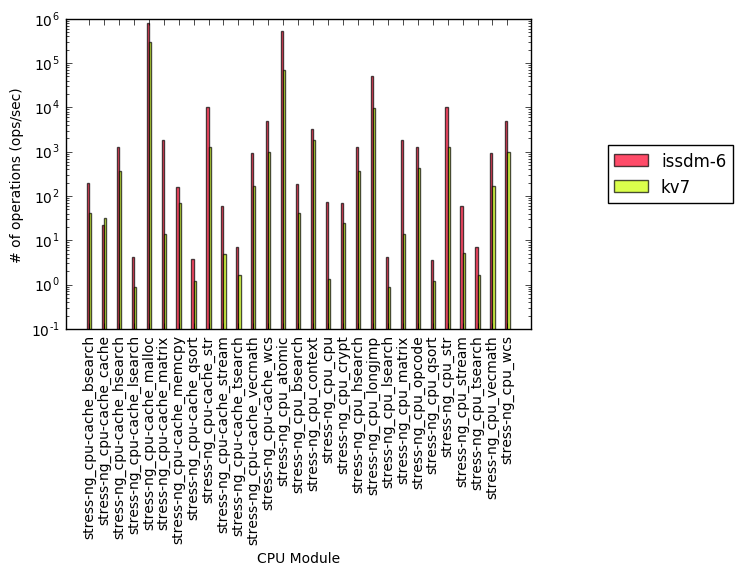

,benchmark,issdm-6,kv7
0,stress-ng_cpu-cache_bsearch,192.114592,40.644334
1,stress-ng_cpu-cache_cache,22.267456,32.517868
2,stress-ng_cpu-cache_hsearch,1248.082509,374.214597
3,stress-ng_cpu-cache_lsearch,4.266826,0.900038
4,stress-ng_cpu-cache_malloc,794755.425075,299243.463959
5,stress-ng_cpu-cache_matrix,1853.195662,13.633909
6,stress-ng_cpu-cache_memcpy,158.297237,68.193758
7,stress-ng_cpu-cache_qsort,3.816790,1.233373
8,stress-ng_cpu-cache_str,10114.058829,1284.058440
9,stress-ng_cpu-cache_stream,60.579865,4.985421


In [4]:
stress_ng_cpu_df = plot_hist(category_name='stress-ng_cpu', yscale='log',
                             xmargin=0.05 , tick_rotation='vertical',
                             xlabel='CPU Module', ylabel='# of operations (ops/sec)')
stress_ng_cpu_df

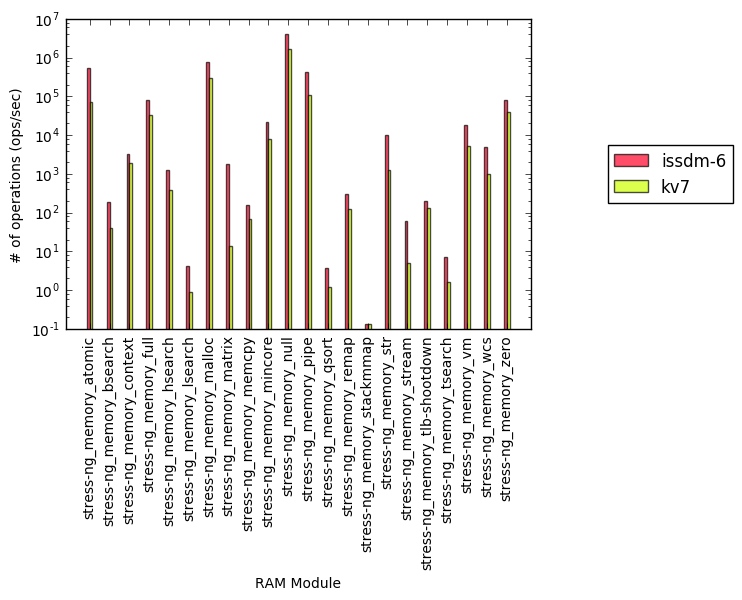

,benchmark,issdm-6,kv7
0,stress-ng_memory_atomic,5.262361e+05,6.959881e+04
1,stress-ng_memory_bsearch,1.926219e+02,4.065565e+01
2,stress-ng_memory_context,3.347291e+03,1.857878e+03
3,stress-ng_memory_full,7.978494e+04,3.353174e+04
4,stress-ng_memory_hsearch,1.245352e+03,3.775128e+02
5,stress-ng_memory_lsearch,4.266823e+00,8.833690e-01
6,stress-ng_memory_malloc,7.942487e+05,3.052412e+05
7,stress-ng_memory_matrix,1.847703e+03,1.371724e+01
8,stress-ng_memory_memcpy,1.598509e+02,6.857609e+01
9,stress-ng_memory_mincore,2.172496e+04,8.130826e+03


In [5]:
stress_ng_memory_df = plot_hist(category_name='stress-ng_memory', yscale='log',
                                xmargin=0.05 , tick_rotation='vertical',
                                xlabel='RAM Module', ylabel='# of operations (ops/sec)')
stress_ng_memory_df

### SysBench: File I/O test

**Use direct I/O for data to avoiding the buffer cache, but the drive write-back caching is activated.**

**Command arguments**: --file-num=128 --file-total-size=8G --file-block-size=1048576 --max-time=60 --max-requests=0 --file-test-mode=seqwr --file-extra-flags=direct --file-fsync-end=on --file-fsync-mode=fsync --num-threads=1 run

- file-num: number of files to create
- file-total-size: total size of files to create
- file-block-size: block size to use in all IO operations (KB)
- max-time: limit for total execution time in seconds
- max-requests: limit for total number of requests (0 for unlimited)
- file-test-mode: test mode (seqwr, seqrd, rndwr, rndrd)
- file-extra-flags=STRING     additional flags to use on opening files {sync,dsync,direct} []
- file-fsync-end=[on|off]     do fsync() at the end of test [on]
- file-fsync-mode=STRING      which method to use for synchronization {fsync, fdatasync} [fsync]
- num-threads: number of threads to use

** Defaults arguments: **
- file-io-mode=sync: file operations mode {sync,async,mmap}
- file-fsync-all=off: do fsync() after each write operation (It forces flushing to disk before moving onto the next write)
- file-merged-requests=0: merge at most this number of IO requests if possible (0 - don't merge)

**"direct"** for oflag=flag

Use direct I/O for data, avoiding the buffer cache. Note that the kernel may impose restrictions on read or write buffer sizes. For example, with an ext4 destination file system and a Linux-based kernel, using ‘oflag=direct’ will cause writes to fail with EINVAL if the output buffer size is not a multiple of 512.

** Original output from kv7 **

```
sysbench 1.0:  multi-threaded system evaluation benchmark

Running the test with following options:
Number of threads: 44
Initializing random number generator from current time


Extra file open flags: 0
128 files, 800MiB each
100GiB total file size
Block size 1KiB
Number of IO requests: 0
Read/Write ratio for combined random IO test: 1.50
Periodic FSYNC enabled, calling fsync() each 100 requests.
Calling fsync() at the end of test, Enabled.
Using synchronous I/O mode
Doing random write test
Initializing worker threads...

Threads started!


File operations:
    reads/s:                      0.00
    writes/s:                     510.89
    fsyncs/s:                     653.22

Throughput:
    read, MiB/s:                  0.00
    written, MiB/s:               0.50

General statistics:
    total time:                          60.0915s
    total number of events:              30700
    total time taken by event execution: 239.9327s
    response time:
         min:                                  0.01ms
         avg:                                  7.82ms
         max:                                192.07ms
         approx.  95 percentile:              46.77ms

Threads fairness:
    events (avg/stddev):           697.7273/66.06
    execution time (avg/stddev):   5.4530/0.58
```

- ** Events/min: ** total number of events / total time (in second) * 60
- ** Req/min: ** writes/s \* 60
- ** Bandwidth: ** throughput - written, [MiB/s](https://en.wikipedia.org/wiki/Mebibyte)

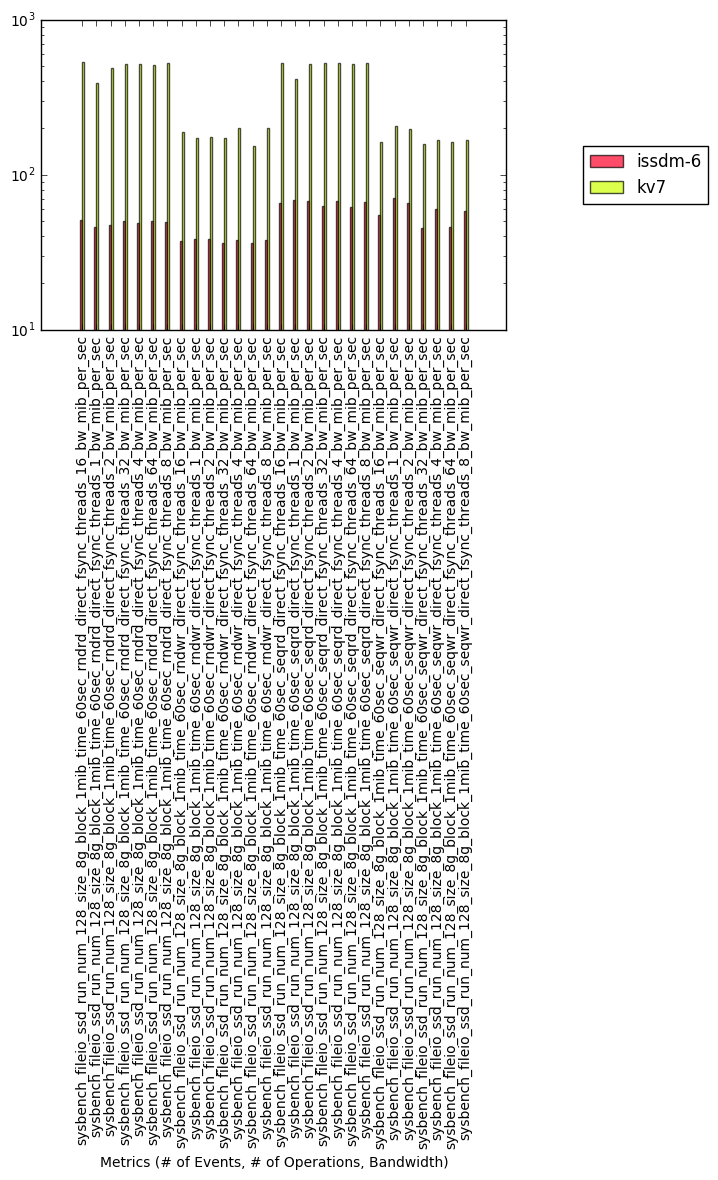

,benchmark,issdm-6,kv7
0,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_16_bw_mib_per_sec,51.20,529.95
1,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_1_bw_mib_per_sec,46.05,392.48
2,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_2_bw_mib_per_sec,47.75,487.89
3,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_32_bw_mib_per_sec,50.48,514.56
4,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_4_bw_mib_per_sec,48.99,516.63
5,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_64_bw_mib_per_sec,50.50,512.26
6,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_8_bw_mib_per_sec,49.86,526.35
7,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndwr_direct_fsync_threads_16_bw_mib_per_sec,37.19,188.94
8,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndwr_direct_fsync_threads_1_bw_mib_per_sec,38.71,171.45
9,sysbench_fileio_ssd_run_num_128_size_8g_block_1mib_time_60sec_rndwr_direct_fsync_threads_2_bw_mib_per_sec,38.40,176.46


In [6]:
sysbench_fileio_df = plot_hist(category_name='sysbench_fileio_ssd_run.*?bw.*', yscale='log',
                               xmargin=0.1 , tick_rotation='vertical',
                               xlabel='Metrics (# of Events, # of Operations, Bandwidth)', ylabel='')
sysbench_fileio_df

##### SSD
- **sequential write**: 70.46	205.35 (2.9 times faster)
- **sequential read**:  67.60	528.22 (7.8 times faster)
- **random read**:      49.86	526.35 (10.6 times faster)
- **random write**:     38.11	200.33 (5.3 times faster)

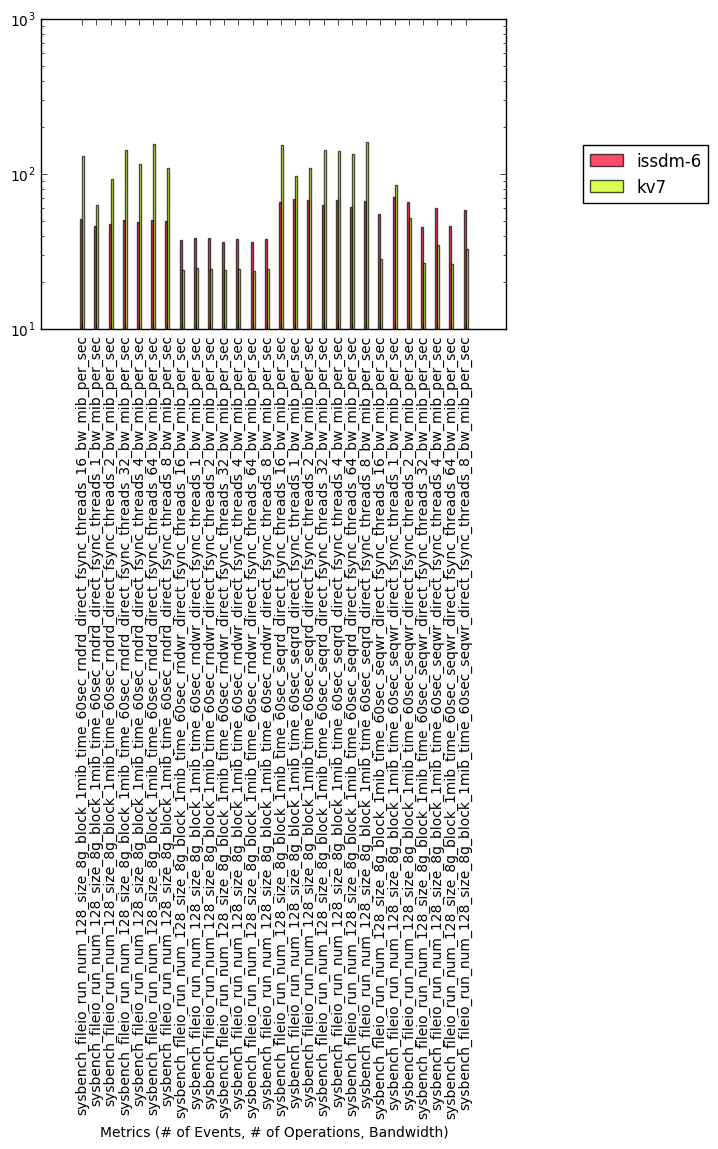

,benchmark,issdm-6,kv7
0,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_16_bw_mib_per_sec,51.20,129.71
1,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_1_bw_mib_per_sec,46.05,63.16
2,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_2_bw_mib_per_sec,47.75,92.38
3,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_32_bw_mib_per_sec,50.48,142.29
4,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_4_bw_mib_per_sec,48.99,115.13
5,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_64_bw_mib_per_sec,50.50,156.37
6,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndrd_direct_fsync_threads_8_bw_mib_per_sec,49.86,109.11
7,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndwr_direct_fsync_threads_16_bw_mib_per_sec,37.19,23.83
8,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndwr_direct_fsync_threads_1_bw_mib_per_sec,38.71,24.87
9,sysbench_fileio_run_num_128_size_8g_block_1mib_time_60sec_rndwr_direct_fsync_threads_2_bw_mib_per_sec,38.40,24.45


In [7]:
sysbench_fileio_df = plot_hist(category_name='sysbench_fileio_run.*?bw.*', yscale='log',
                               xmargin=0.1 , tick_rotation='vertical',
                               xlabel='Metrics (# of Events, # of Operations, Bandwidth)', ylabel='')
sysbench_fileio_df

##### HDD
- **sequential write**: 70.46	84.90 (1.2 times faster)
- **sequential read**:  66.57	161.06 (2.4 times faster)
- **random read**:      48.99	115.13 (2.4 times faster)
- **random write**:     38.71	24.87 (0.6 times faster)

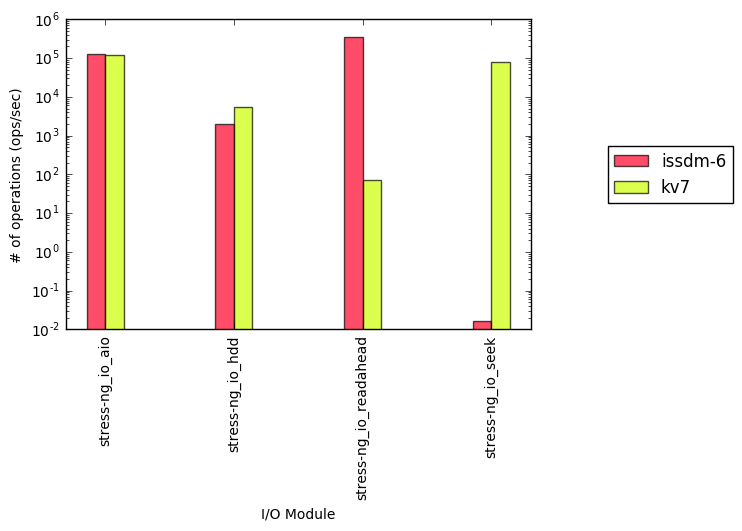

,benchmark,issdm-6,kv7
0,stress-ng_io_aio,127132.717063,120292.131696
1,stress-ng_io_hdd,2024.207185,5342.666895
2,stress-ng_io_readahead,357571.676471,72.472698
3,stress-ng_io_seek,0.016665,81209.910363


In [8]:
stress_ng_io_df = plot_hist(category_name='stress-ng_io', yscale='log',
                            xmargin=0.05 , tick_rotation='vertical',
                            xlabel='I/O Module', ylabel='# of operations (ops/sec)')
stress_ng_io_df

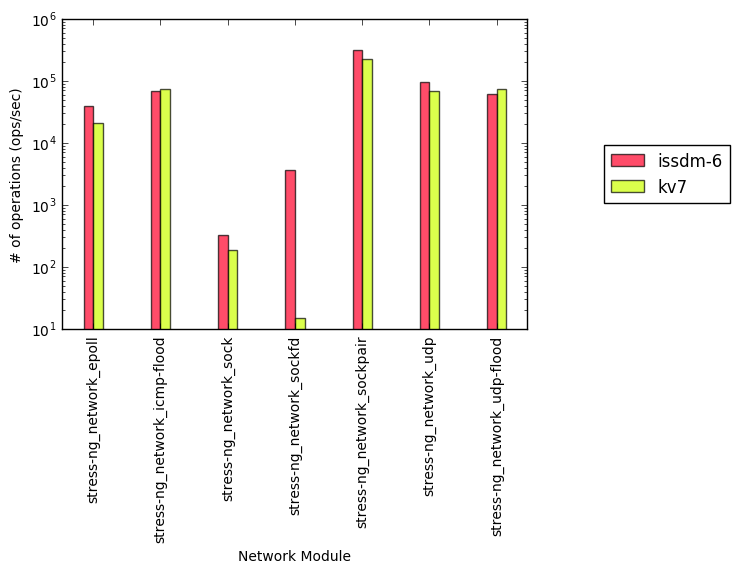

,benchmark,issdm-6,kv7
0,stress-ng_network_epoll,39162.016717,20560.092477
1,stress-ng_network_icmp-flood,69426.009961,74510.751245
2,stress-ng_network_sock,327.350665,184.705676
3,stress-ng_network_sockfd,3707.520459,14.801465
4,stress-ng_network_sockpair,319364.582878,227925.441470
5,stress-ng_network_udp,95622.937486,67807.689770
6,stress-ng_network_udp-flood,61307.795604,75162.202673


In [9]:
stress_ng_network_df = plot_hist(category_name='stress-ng_network', yscale='log',
                                 xmargin=0.05 , tick_rotation='vertical',
                                 xlabel='Network Module', ylabel='# of operations (ops/sec)')
stress_ng_network_df

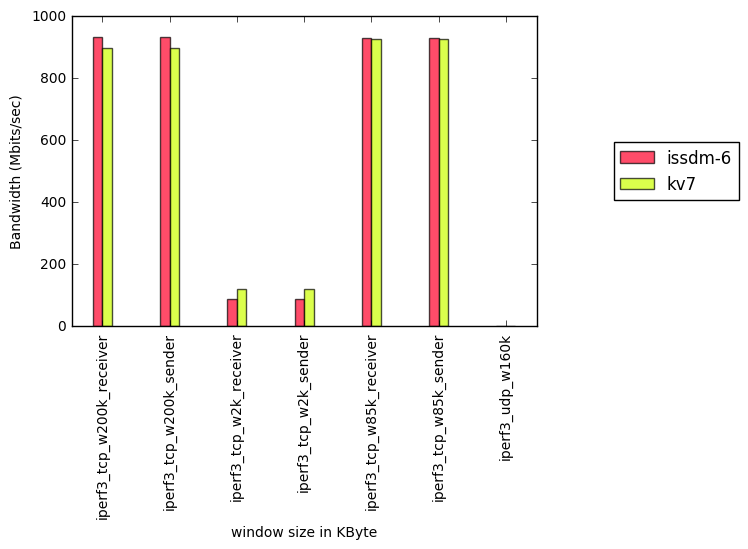

,benchmark,issdm-6,kv7
0,iperf3_tcp_w200k_receiver,932.00,899.00
1,iperf3_tcp_w200k_sender,932.00,899.00
2,iperf3_tcp_w2k_receiver,87.70,119.00
3,iperf3_tcp_w2k_sender,87.70,119.00
4,iperf3_tcp_w85k_receiver,930.00,928.00
5,iperf3_tcp_w85k_sender,930.00,928.00
6,iperf3_udp_w160k,1.05,1.05


In [10]:
iperf3_df = plot_hist(category_name='iperf3', yscale='linear',
                                 xmargin=0.05 , tick_rotation='vertical',
                                 xlabel='window size in KByte', ylabel='Bandwidth (Mbits/sec)')
iperf3_df

### Resources

- SysBench manual: http://imysql.com/wp-content/uploads/2014/10/sysbench-manual.pdf
- Sysbench usage: https://wiki.gentoo.org/wiki/Sysbench#Using_the_memory_workload
- Iperf Tutorial: https://www.es.net/assets/Uploads/201007-JTIperf.pdf
- iPerf 3 user documentation: https://iperf.fr/iperf-doc.php#3doc

## Summary

**Configuration of KV Drive**



**Configuration of issdm-6**


### Results

#### CPU
Based on primality test (SysBench) and cpu, cpu-cache benchmarks (stress-ng)

KV drive is **16** times **slower** than issdm-6

#### Memory
Based on SysBench memory functions speed test

- **sequential write**: (1.5 times faster than issdm-6)
- **sequential read**:  (1.5 times faster)
- **random read**:      (5.4 times slower)
- **random write**:     (1.9 times slower)

#### File I/O (SSD vs HDD)
Based on SysBench File I/O test

- **sequential write**: (2.9 times faster than issdm-6 / 1.2)
- **sequential read**:  (7.8 times faster / 2.4)
- **random read**:      (10.6 times faster / 2.4)
- **random write**:     (5.3 times faster / 0.6)

#### Network bandwidth
Based on stress-ng network test and iperf3 Network bandwidth performance test

UDP and TCP almost the same.